In [30]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import math
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn import metrics
import statsmodels.api as sm

Text(0.5, 1.0, 'Logistic Function')

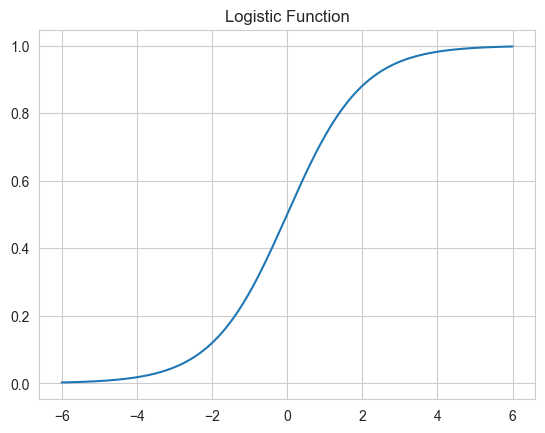

In [31]:
def logistic(t):
    return 1.0/(1+math.exp((-1.0)*t))

t =np.linspace(-6,6,500)
y = np.array([logistic(ele) for ele in t])

plt.plot(t,y)
plt.title('Logistic Function')

In [32]:
df = sm.datasets.fair.load_pandas().data
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [33]:
def affair_check(x):
    if x !=0:
        return 1
    else:
        return 0
        

In [34]:
df['Had_Affairs']=df['affairs'].apply(affair_check)
df

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,Had_Affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1
...,...,...,...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0.000000,0
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0.000000,0
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0.000000,0
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0.000000,0


In [35]:
df.groupby('Had_Affairs').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
Had_Affairs,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


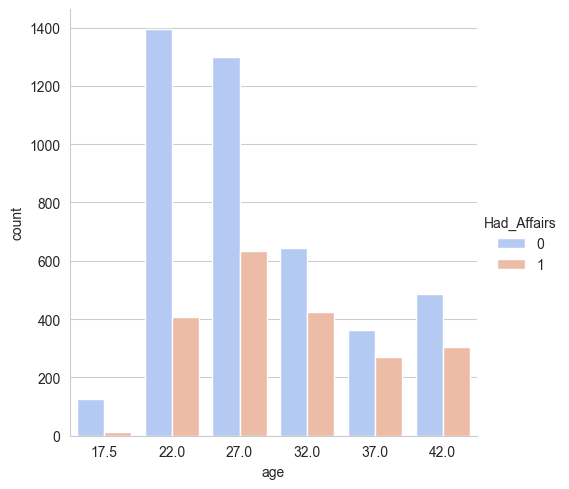

In [36]:
sns.catplot(x='age', data=df,hue='Had_Affairs', kind='count', palette='coolwarm')

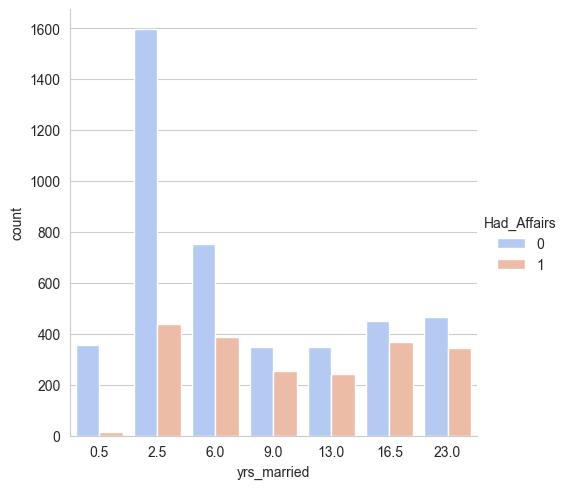

In [37]:
sns.catplot(x='yrs_married', data=df,hue='Had_Affairs', kind='count', palette='coolwarm')

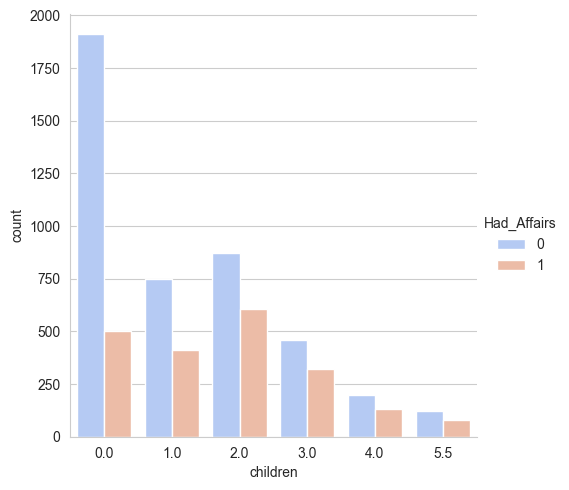

In [38]:
sns.catplot(x='children', data=df,hue='Had_Affairs', kind='count', palette='coolwarm')

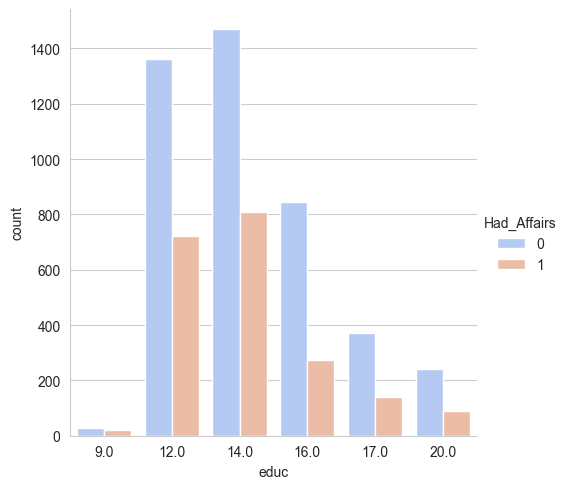

In [39]:
sns.catplot(x='educ', data=df,hue='Had_Affairs', kind='count', palette='coolwarm')

In [40]:
df

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,Had_Affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1
...,...,...,...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0.000000,0
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0.000000,0
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0.000000,0
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0.000000,0


In [41]:
occ_dummies = pd.get_dummies(df['occupation']).astype(int)

In [42]:
hus_occ_dummies = pd.get_dummies(df['occupation_husb']).astype(int)

In [43]:
occ_dummies.head()

,1.0,2.0,3.0,4.0,5.0,6.0
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,0,0,1,0
4,0,0,1,0,0,0


In [44]:
occ_dummies.columns = ['occ1','occ2','occ3','occ4','occ5','occ6']

In [45]:
hus_occ_dummies.columns = ['hocc1','hocc2','hocc3','hocc4','hocc5','hocc6']

In [46]:
X=df.drop(['occupation','occupation_husb','Had_Affairs'],axis = 1)
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,4.666666


In [47]:
dummies = pd.concat([occ_dummies,hus_occ_dummies],axis=1)

In [48]:
X=pd.concat([X,dummies],axis=1)

In [49]:
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,affairs,occ1,occ2,occ3,occ4,occ5,occ6,hocc1,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,0.111111,0,1,0,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.230769,0,0,1,0,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,1.400000,0,0,1,0,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0.727273,0,0,0,0,1,0,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,4.666666,0,0,1,0,0,0,0,0,0,1,0,0


In [50]:
Y=df['Had_Affairs']
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: Had_Affairs, dtype: int64

In [51]:
X = X.drop(['occ1','hocc1','affairs'],axis=1)

In [52]:
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,occ2,occ3,occ4,occ5,occ6,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,1,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,0,1,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,0,1,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0,0,0,1,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,0,1,0,0,0,0,0,1,0,0


In [53]:
Y = np.ravel(Y)
Y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [54]:
log_model = LogisticRegression()
log_model.fit(X,Y)
log_model.score(X,Y)

C:\Users\abin.k\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.725416273955388

In [55]:
Y.mean()

0.3224945020420987

In [58]:
coeff_df = DataFrame(zip(X.columns,np.transpose(log_model.coef_)))
coeff_df

,0,1
0,rate_marriage,[-0.6999079470829059]
1,age,[-0.05225402672312876]
2,yrs_married,[0.0956917144408547]
3,children,[0.03268852986249706]
4,religious,[-0.3677498683816792]
5,educ,[0.02296338041054749]
6,occ2,[0.33317620379597807]
7,occ3,[0.6371532056002558]
8,occ4,[0.2831905460627366]
9,occ5,[0.8455283297457672]


In [59]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y)
log_model2 = LogisticRegression()
log_model2.fit(X_train,Y_train)

C:\Users\abin.k\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [62]:
class_predict= log_model2.predict(X_test)

In [64]:
print(metrics.accuracy_score(Y_test,class_predict))

0.7305276381909548
